In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy as sp
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df=pd.read_excel('sales.xls')
df.head(5)

Row ID  Order ID Order Date Order Priority  Order Quantity       Sales  \
0       1         3 2010-10-13            Low               6    261.5400   
1      49       293 2012-10-01           High              49  10123.0200   
2      50       293 2012-10-01           High              27    244.5700   
3      80       483 2011-07-10           High              30   4965.7595   
4      85       515 2010-08-28  Not Specified              19    394.2700   

   Discount       Ship Mode     Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.2500       38.94  ...  Muhammed MacIntyre   
1      0.07  Delivery Truck   457.8100      208.16  ...        Barry French   
2      0.01     Regular Air    46.7075        8.69  ...        Barry French   
3      0.08     Regular Air  1198.9710      195.99  ...       Clay Rozendal   
4      0.08     Regular Air    30.9400       21.78  ...      Carlos Soltero   

  Province   Region Customer Segment Product Category  \
0  Nunavut  Nunavut   Small Business  Office Supplies   
1  Nunavut  Nunavut         Consumer  Office Supplies   
2  Nunavut  Nunavut         Consumer  Office Supplies   
3  Nunavut  Nunavut        Corporate       Technology   
4  Nunavut  Nunavut         Consumer  Office Supplies   

             Product Sub-Category  \
0          Storage & Organization   
1                      Appliances   
2  Binders and Binder Accessories   
3    Telephones and Communication   
4                      Appliances   

                                        Product Name Product Container  \
0   Eldon Base for stackable storage shelf, platinum         Large Box   
1  1.7 Cubic Foot Compact "Cube" Office Refrigera...        Jumbo Drum   
2   Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl         Small Box   
3                                               R380         Small Box   
4                           Holmes HEPA Air Purifier        Medium Box   

  Product Base Margin  Ship Date  
0                0.80 2010-10-20  
1                0.58 2012-10-02  
2                0.39 2012-10-03  
3                0.58 2011-07-12  
4                0.50 2010-08-30  

[5 rows x 21 columns]

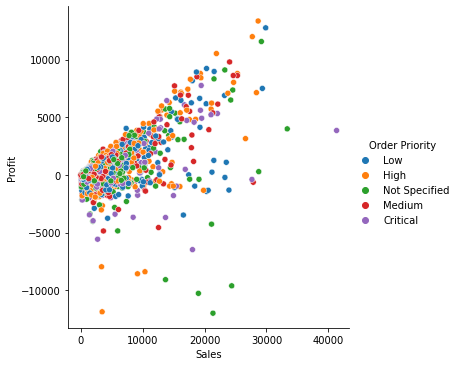

In [3]:
sns.relplot('Sales','Profit',data=df,hue='Order Priority')

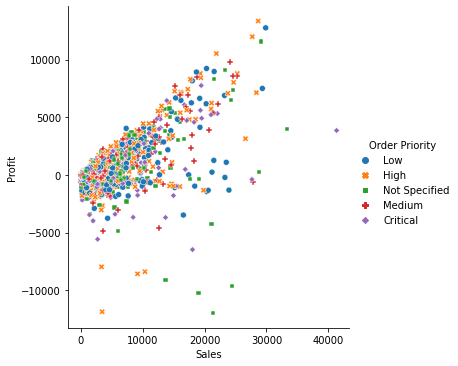

In [4]:
sns.relplot('Sales','Profit',data=df,hue='Order Priority',style='Order Priority')

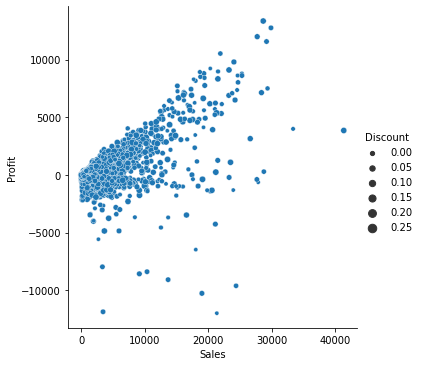

In [5]:
sns.relplot('Sales','Profit',data=df,size='Discount')

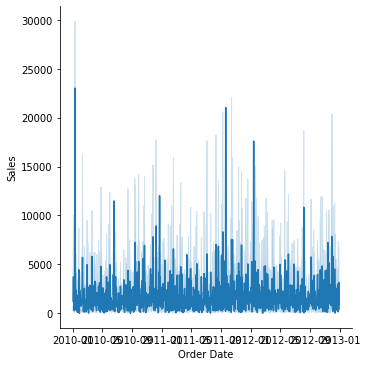

In [6]:
sns.relplot('Order Date','Sales',data=df,kind='line')

In [7]:
df['year']=df['Order Date'].dt.year

In [8]:
df.year.unique()

array([2010, 2012, 2011], dtype=int64)

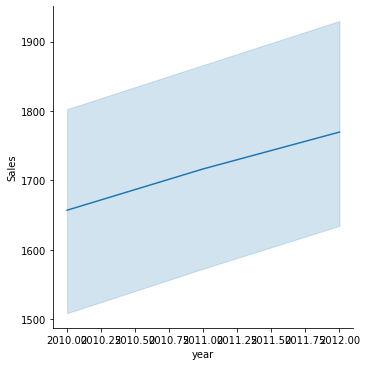

In [9]:
sns.relplot('year','Sales',data=df,kind='line')

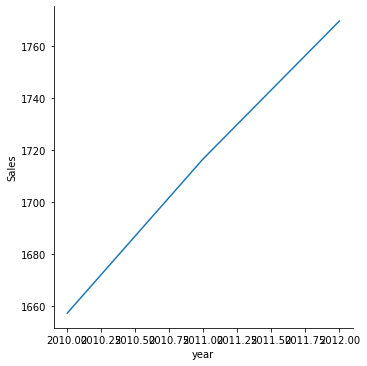

In [10]:
sns.relplot('year','Sales',data=df,kind='line',ci=None)

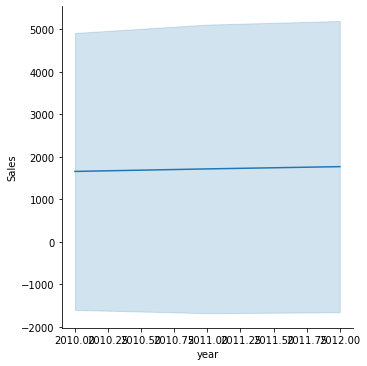

In [11]:
sns.relplot('year','Sales',data=df,kind='line',ci="sd")

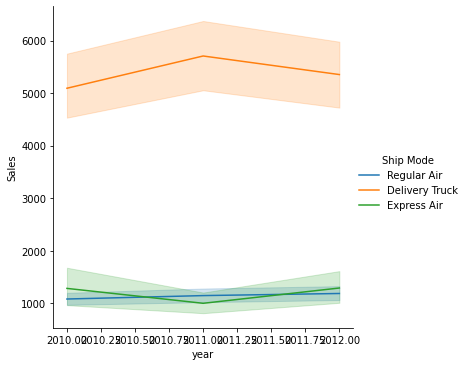

In [12]:
sns.relplot('year','Sales',data=df,kind='line',hue='Ship Mode')

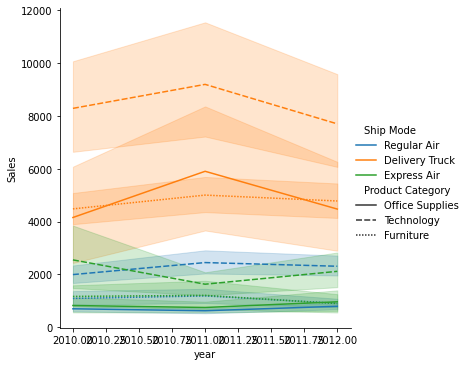

In [13]:
sns.relplot('year','Sales',data=df,kind='line',hue='Ship Mode',style="Product Category")

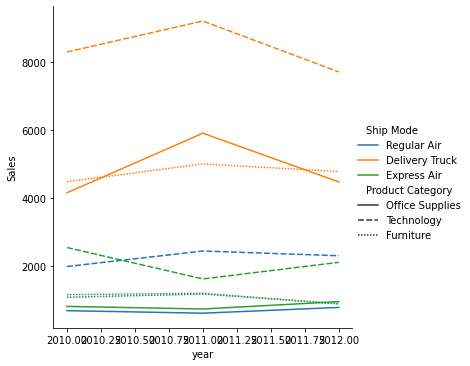

In [14]:
sns.relplot('year','Sales',data=df,kind='line',hue='Ship Mode',style="Product Category",ci=None)

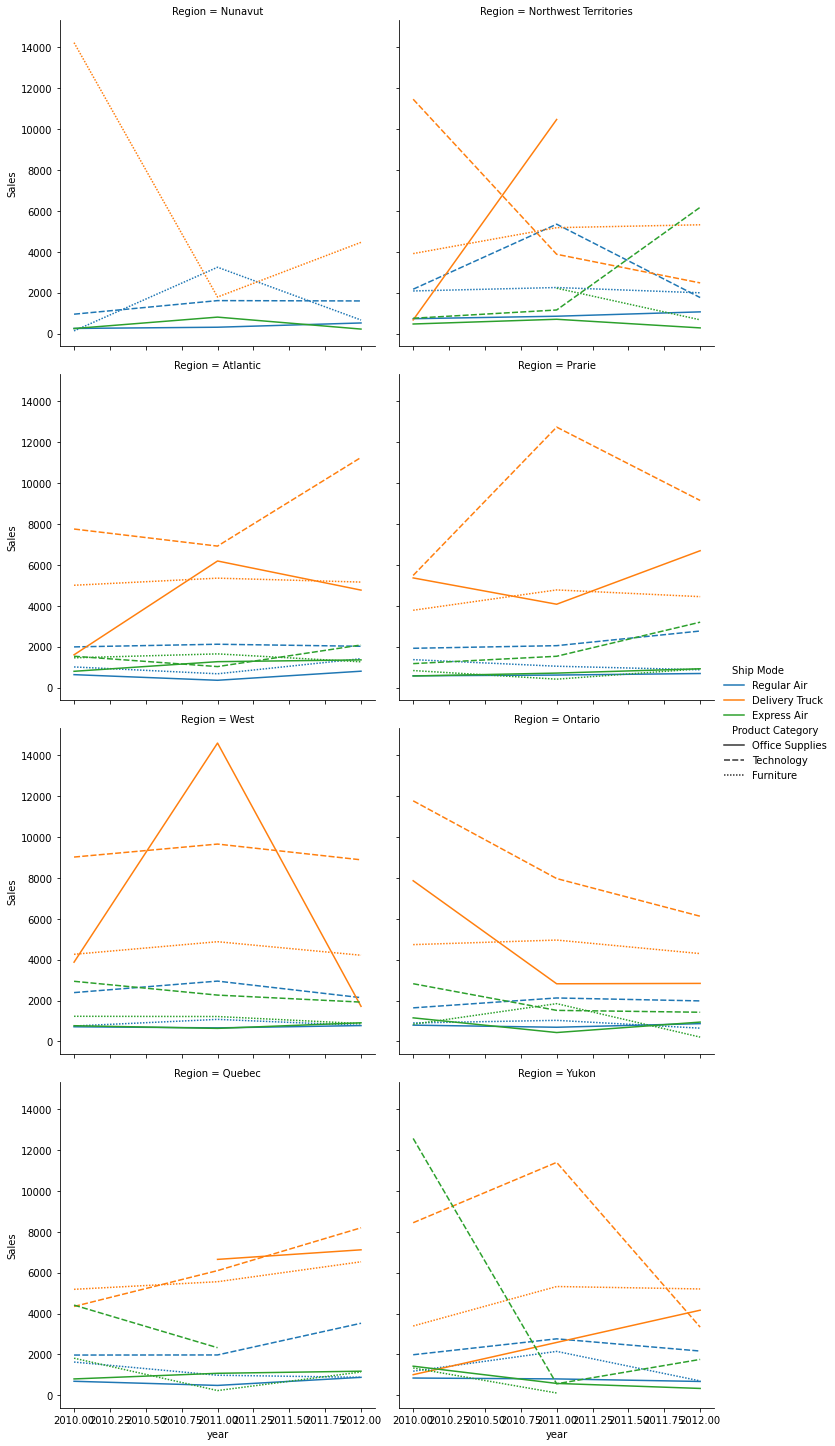

In [15]:
sns.relplot('year','Sales',data=df,kind='line',hue='Ship Mode',style="Product Category",ci=None,col="Region",col_wrap=2)

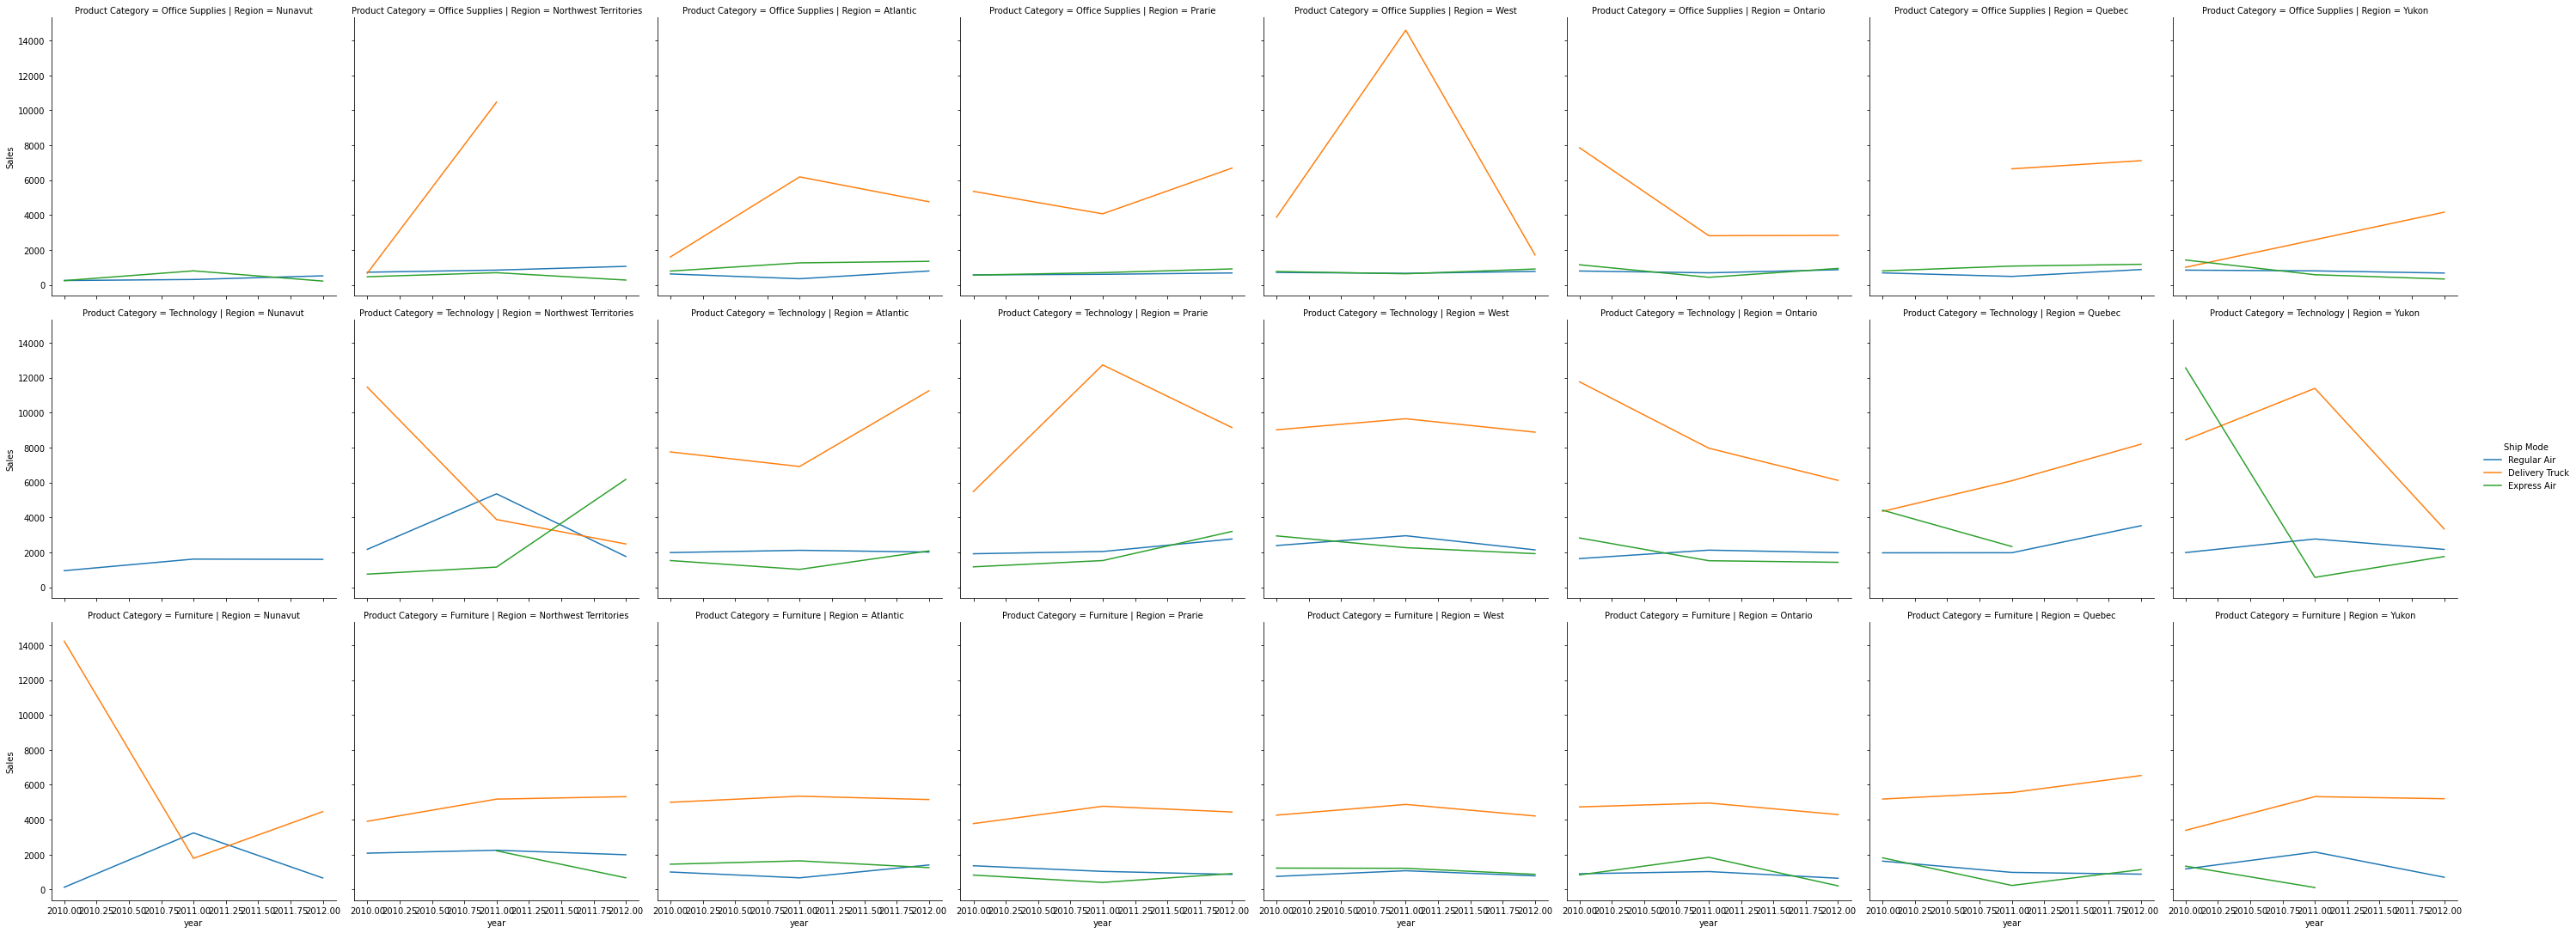

In [20]:
sns.relplot('year','Sales',data=df,kind='line',hue='Ship Mode',ci=None,col="Region",row="Product Category")

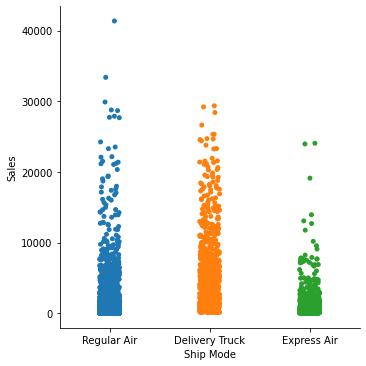

In [21]:
sns.catplot('Ship Mode','Sales',data=df)

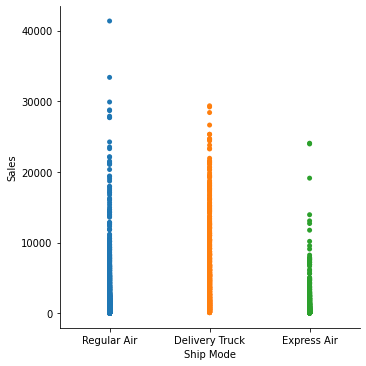

In [22]:
sns.catplot('Ship Mode','Sales',data=df,jitter=False)

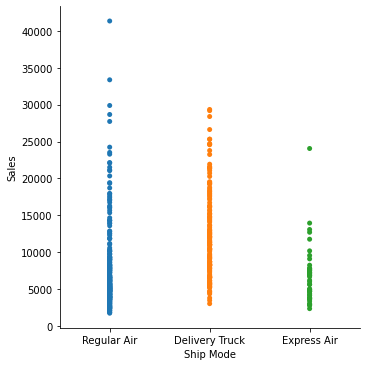

In [23]:
sns.catplot('Ship Mode','Sales',data=df.query("Profit > 1000"),jitter=False)

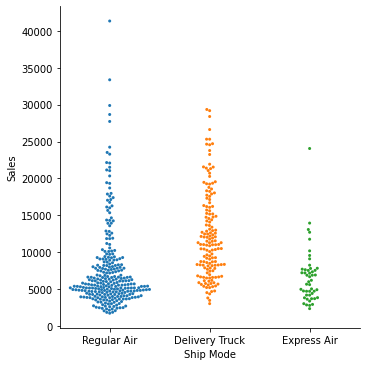

In [27]:
sns.catplot('Ship Mode','Sales',data=df.query("Profit > 1000"),kind='swarm',s=3)

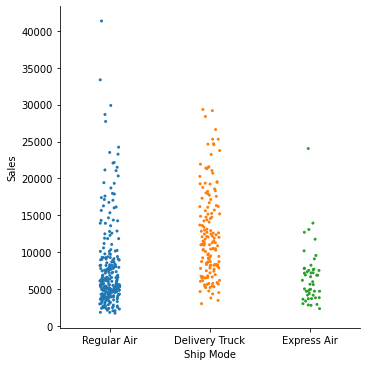

In [28]:
sns.catplot('Ship Mode','Sales',data=df.query("Profit > 1000"),kind='strip',s=3)

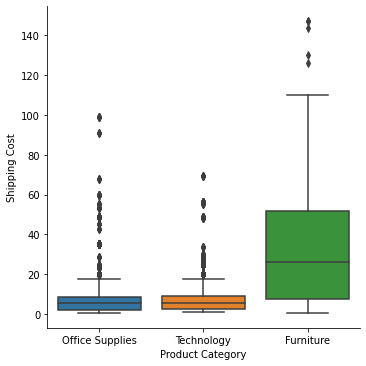

In [30]:
sns.catplot(x="Product Category",y="Shipping Cost",data=df,kind='box')

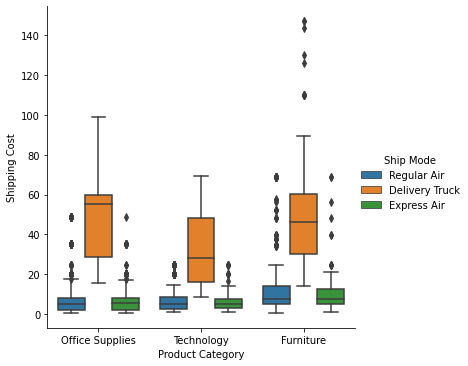

In [31]:
sns.catplot(x="Product Category",y="Shipping Cost",data=df,kind='box',hue='Ship Mode')

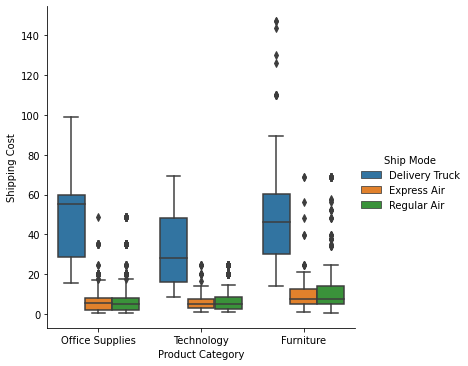

In [34]:
sns.catplot(x="Product Category",y="Shipping Cost",data=df,kind='box',hue='Ship Mode',hue_order=['Delivery Truck','Express Air','Regular Air'])

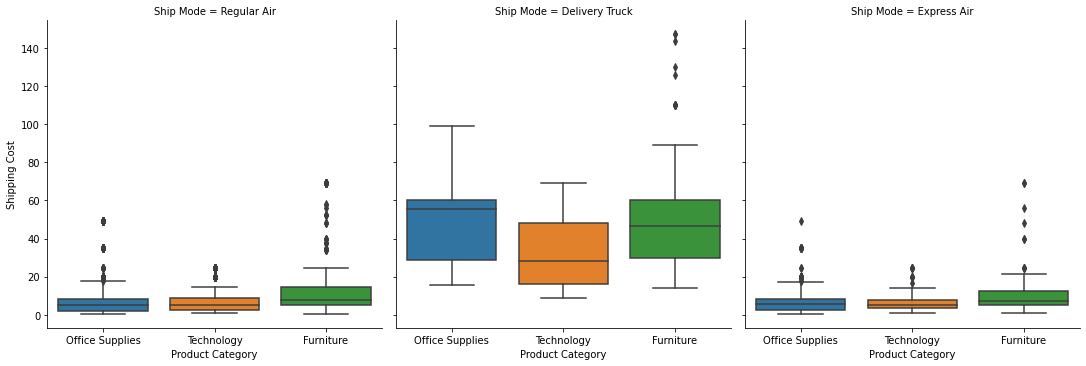

In [35]:
sns.catplot(x="Product Category",y="Shipping Cost",data=df,kind='box',col='Ship Mode')

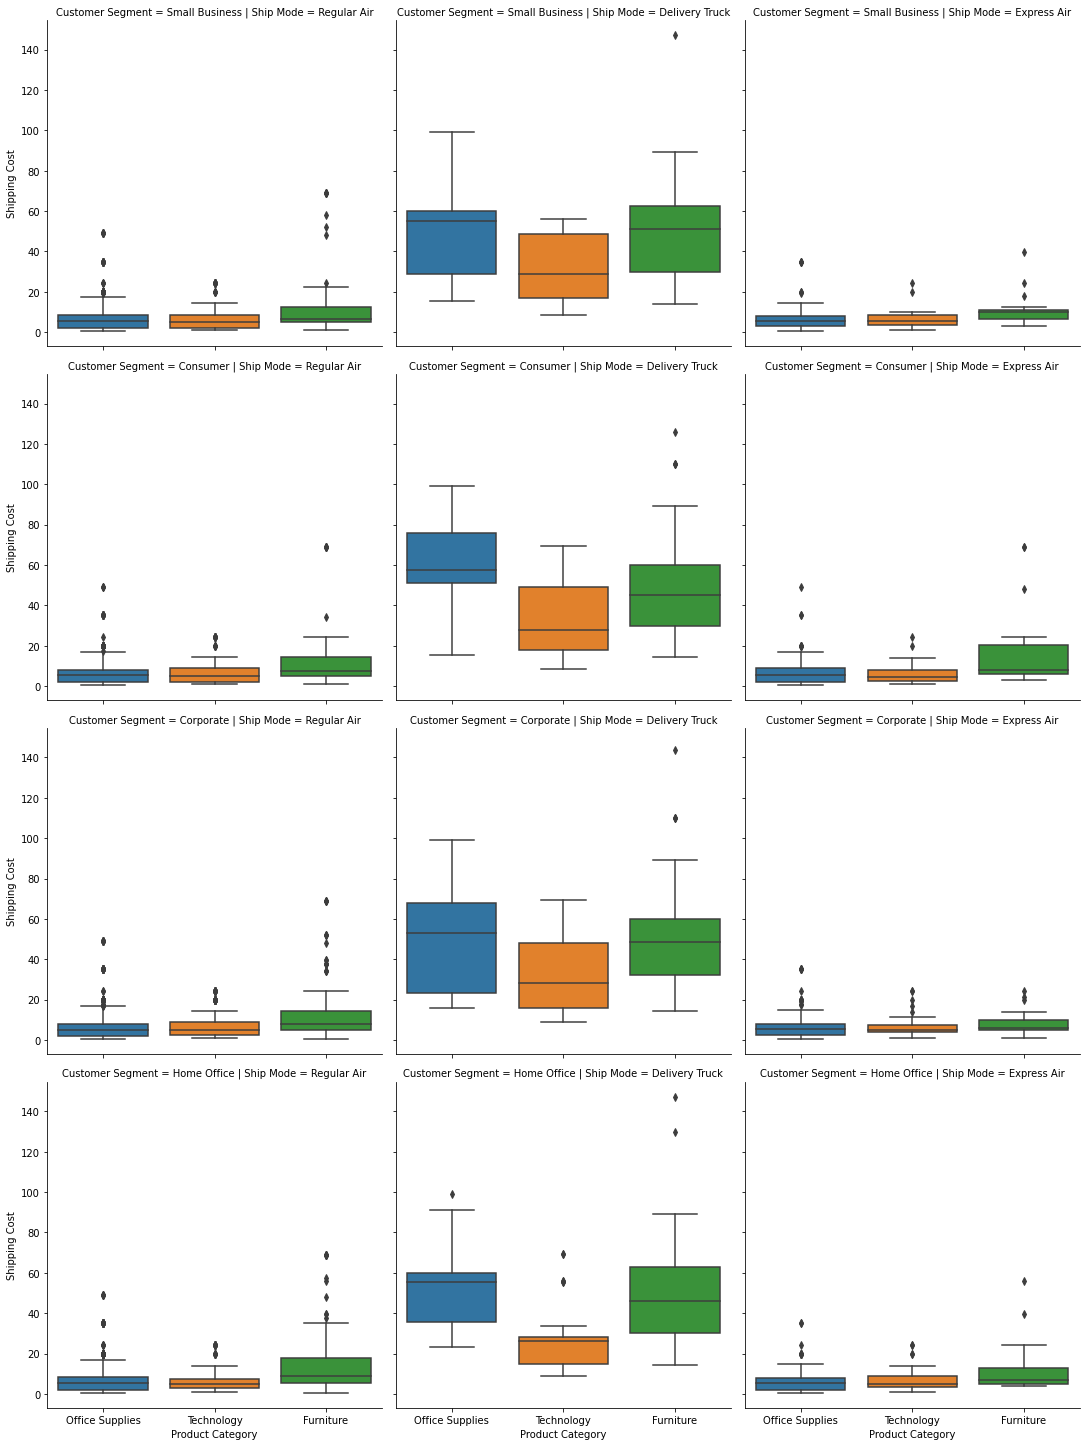

In [36]:
sns.catplot(x="Product Category",y="Shipping Cost",data=df,kind='box',col='Ship Mode',row='Customer Segment')

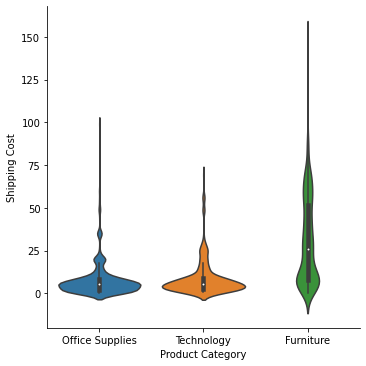

In [37]:
sns.catplot(x="Product Category",y="Shipping Cost",data=df,kind='violin')

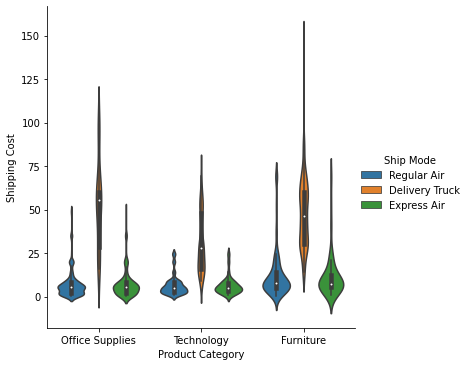

In [39]:
sns.catplot(x="Product Category",y="Shipping Cost",hue='Ship Mode',data=df,kind='violin')

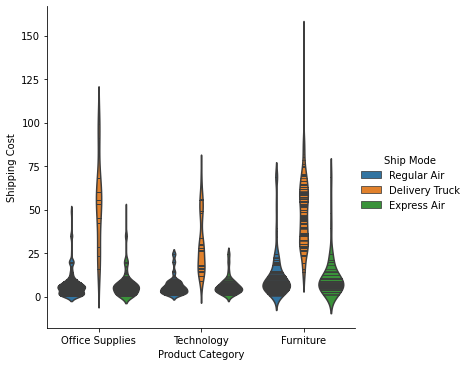

In [40]:
sns.catplot(x="Product Category",y="Shipping Cost",hue='Ship Mode',inner='stick',data=df,kind='violin')

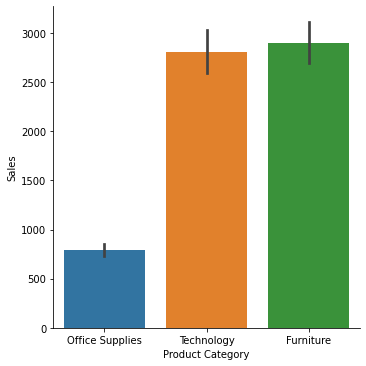

In [42]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='bar')

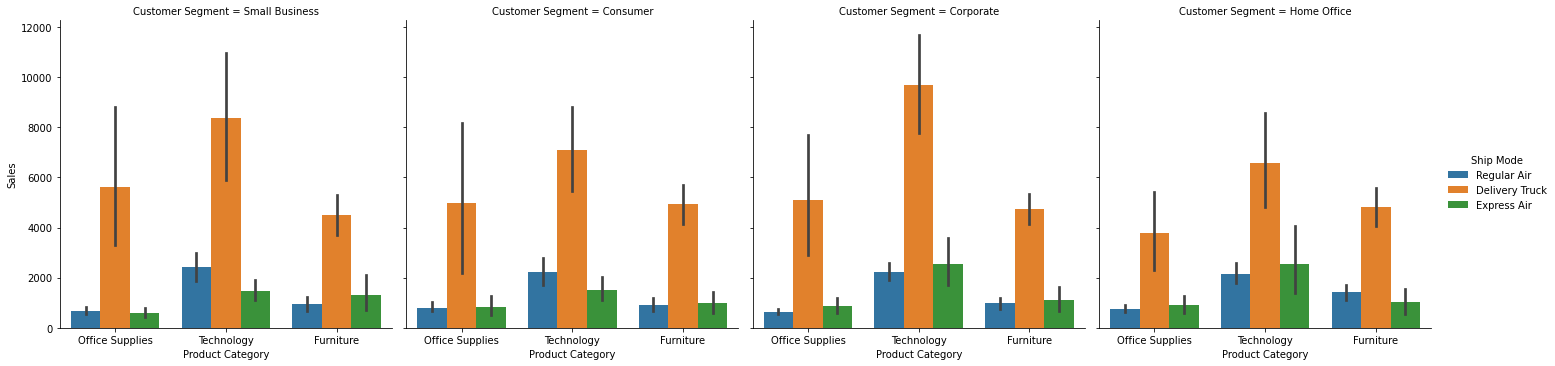

In [44]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='bar',hue='Ship Mode',col='Customer Segment')

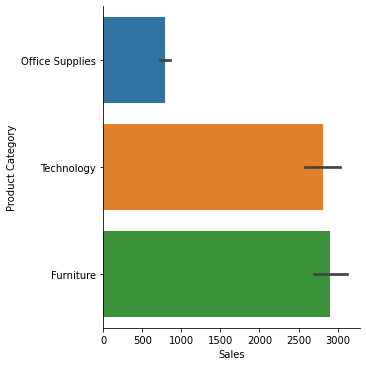

In [45]:
sns.catplot(y="Product Category",x="Sales",data=df,kind='bar')

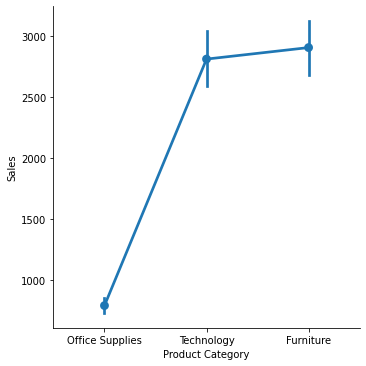

In [46]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='point')

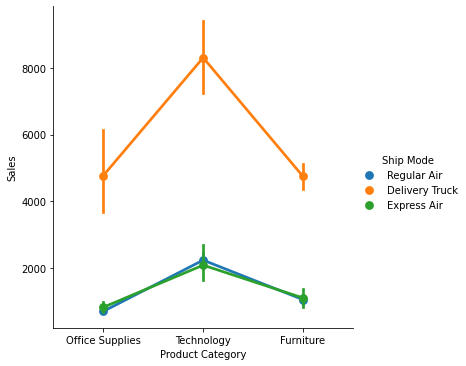

In [47]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='point',hue='Ship Mode')

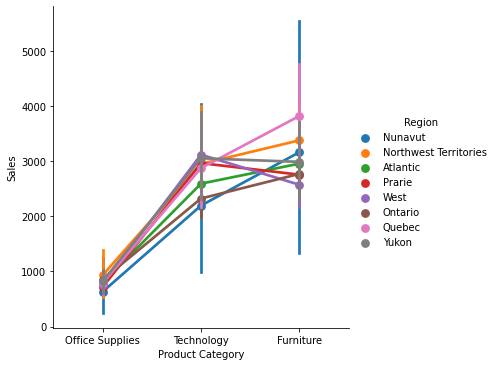

In [48]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='point',hue='Region')

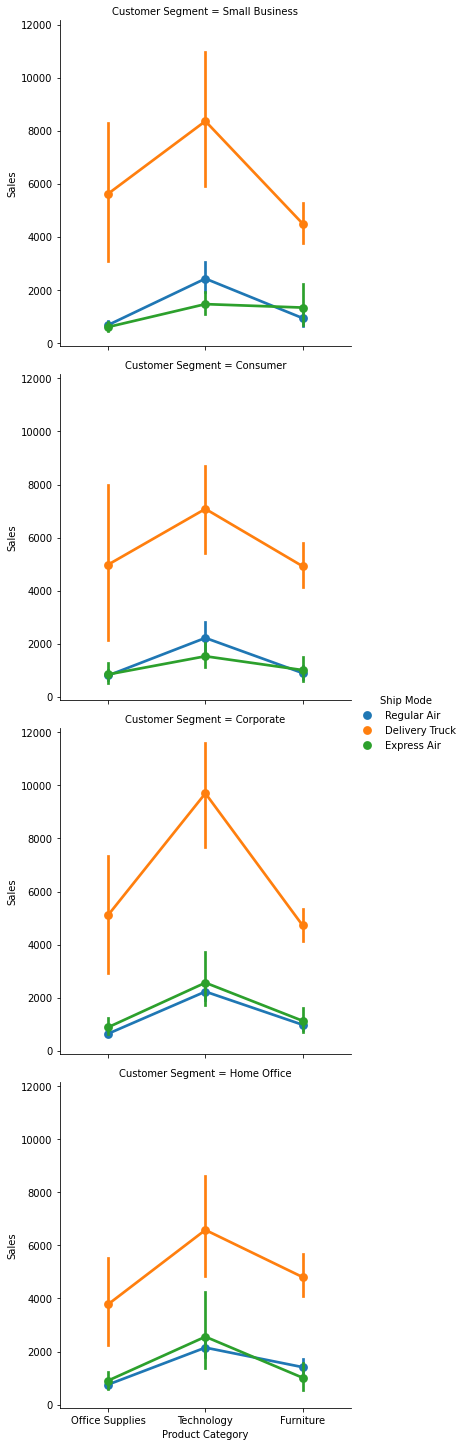

In [49]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='point',hue='Ship Mode',row='Customer Segment')

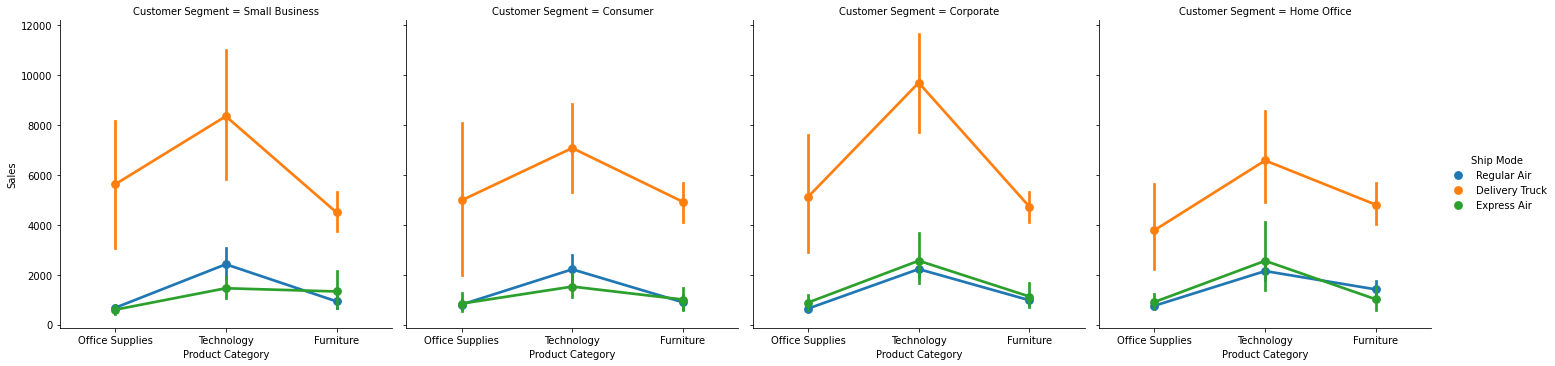

In [50]:
sns.catplot(x="Product Category",y="Sales",data=df,kind='point',hue='Ship Mode',col='Customer Segment')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

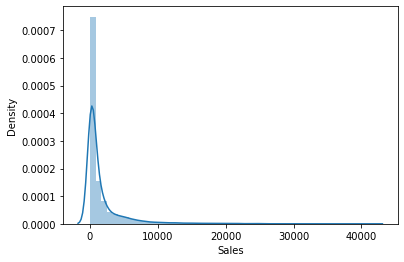

In [51]:
sns.distplot(df.Sales)

<AxesSubplot:xlabel='Profit'>

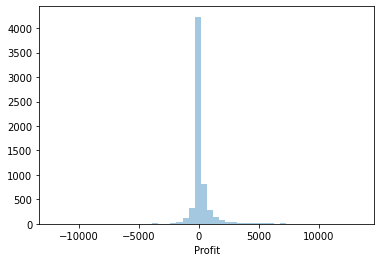

In [53]:
sns.distplot(df.Profit,kde=False)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

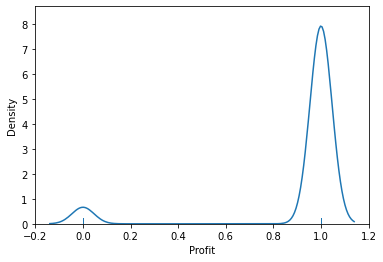

In [59]:
sns.distplot(df.Profit<1000,hist=False,rug=True)

<AxesSubplot:xlabel='Profit'>

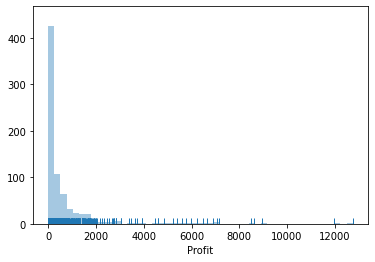

In [70]:
sns.distplot(df.Profit[(df.Region=="West")&(df.Profit>0)],kde=False,rug=True)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

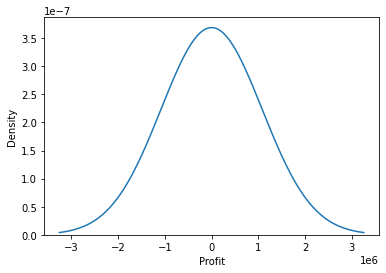

In [72]:
sns.kdeplot(df.Profit,bw=1000)

In [82]:
from scipy import stats
a=np.random.gamma(6,size=200)

<AxesSubplot:ylabel='Density'>

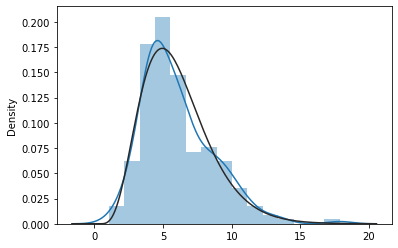

In [83]:
sns.distplot(a,fit=stats.gamma)

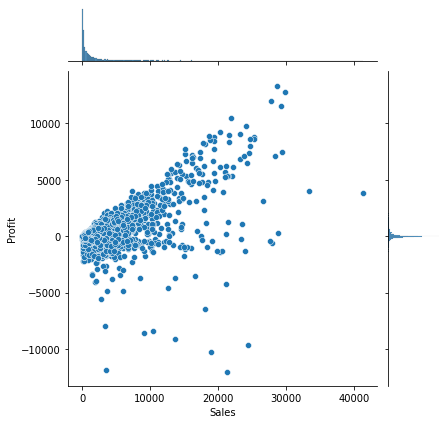

In [84]:
sns.jointplot("Sales","Profit",data=df)

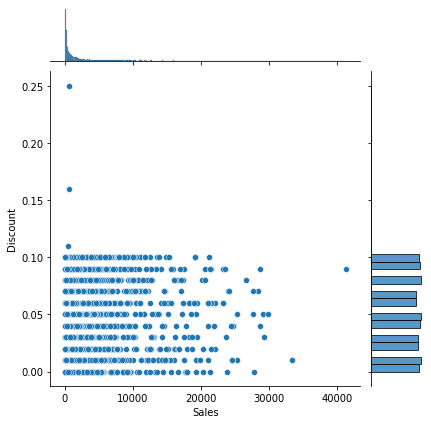

In [85]:
sns.jointplot("Sales","Discount",data=df)

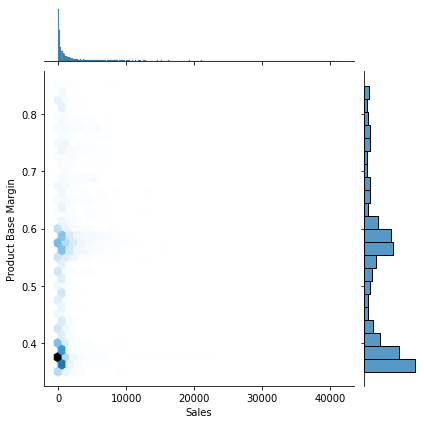

In [87]:
sns.jointplot("Sales","Product Base Margin",data=df,kind='hex')

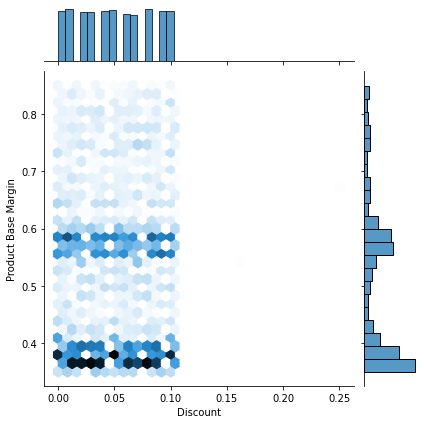

In [88]:
sns.jointplot("Discount","Product Base Margin",data=df,kind='hex')

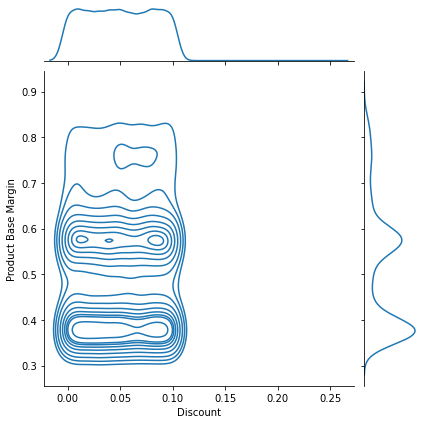

In [89]:
sns.jointplot("Discount","Product Base Margin",data=df,kind='kde')

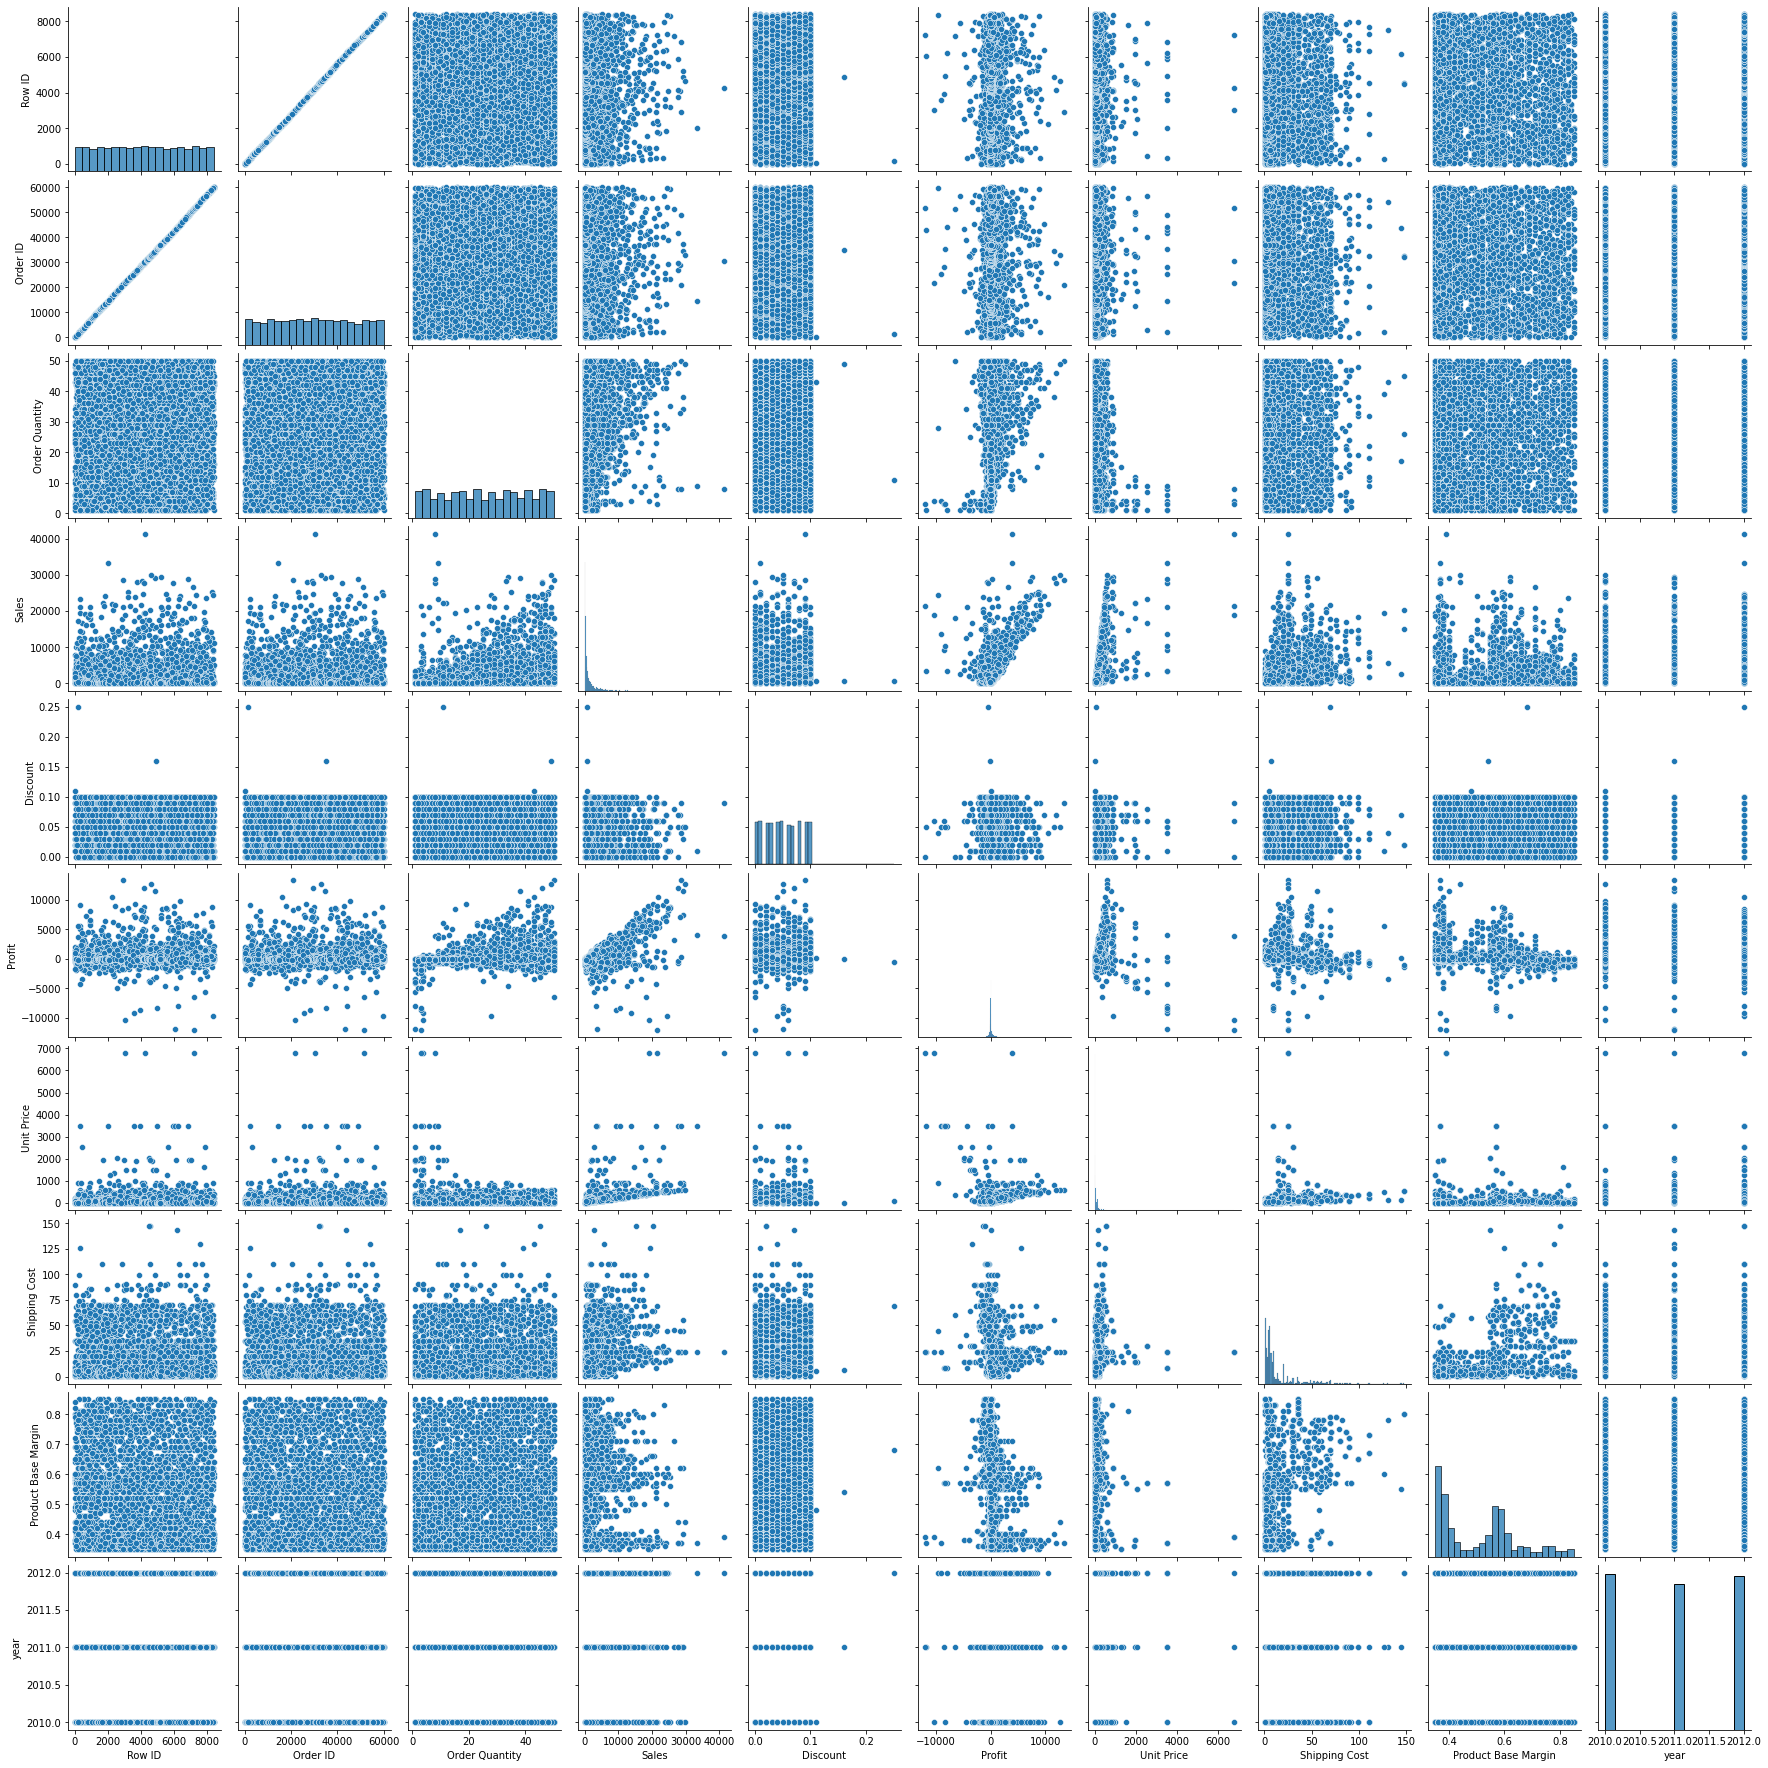

In [90]:
sns.pairplot(df)

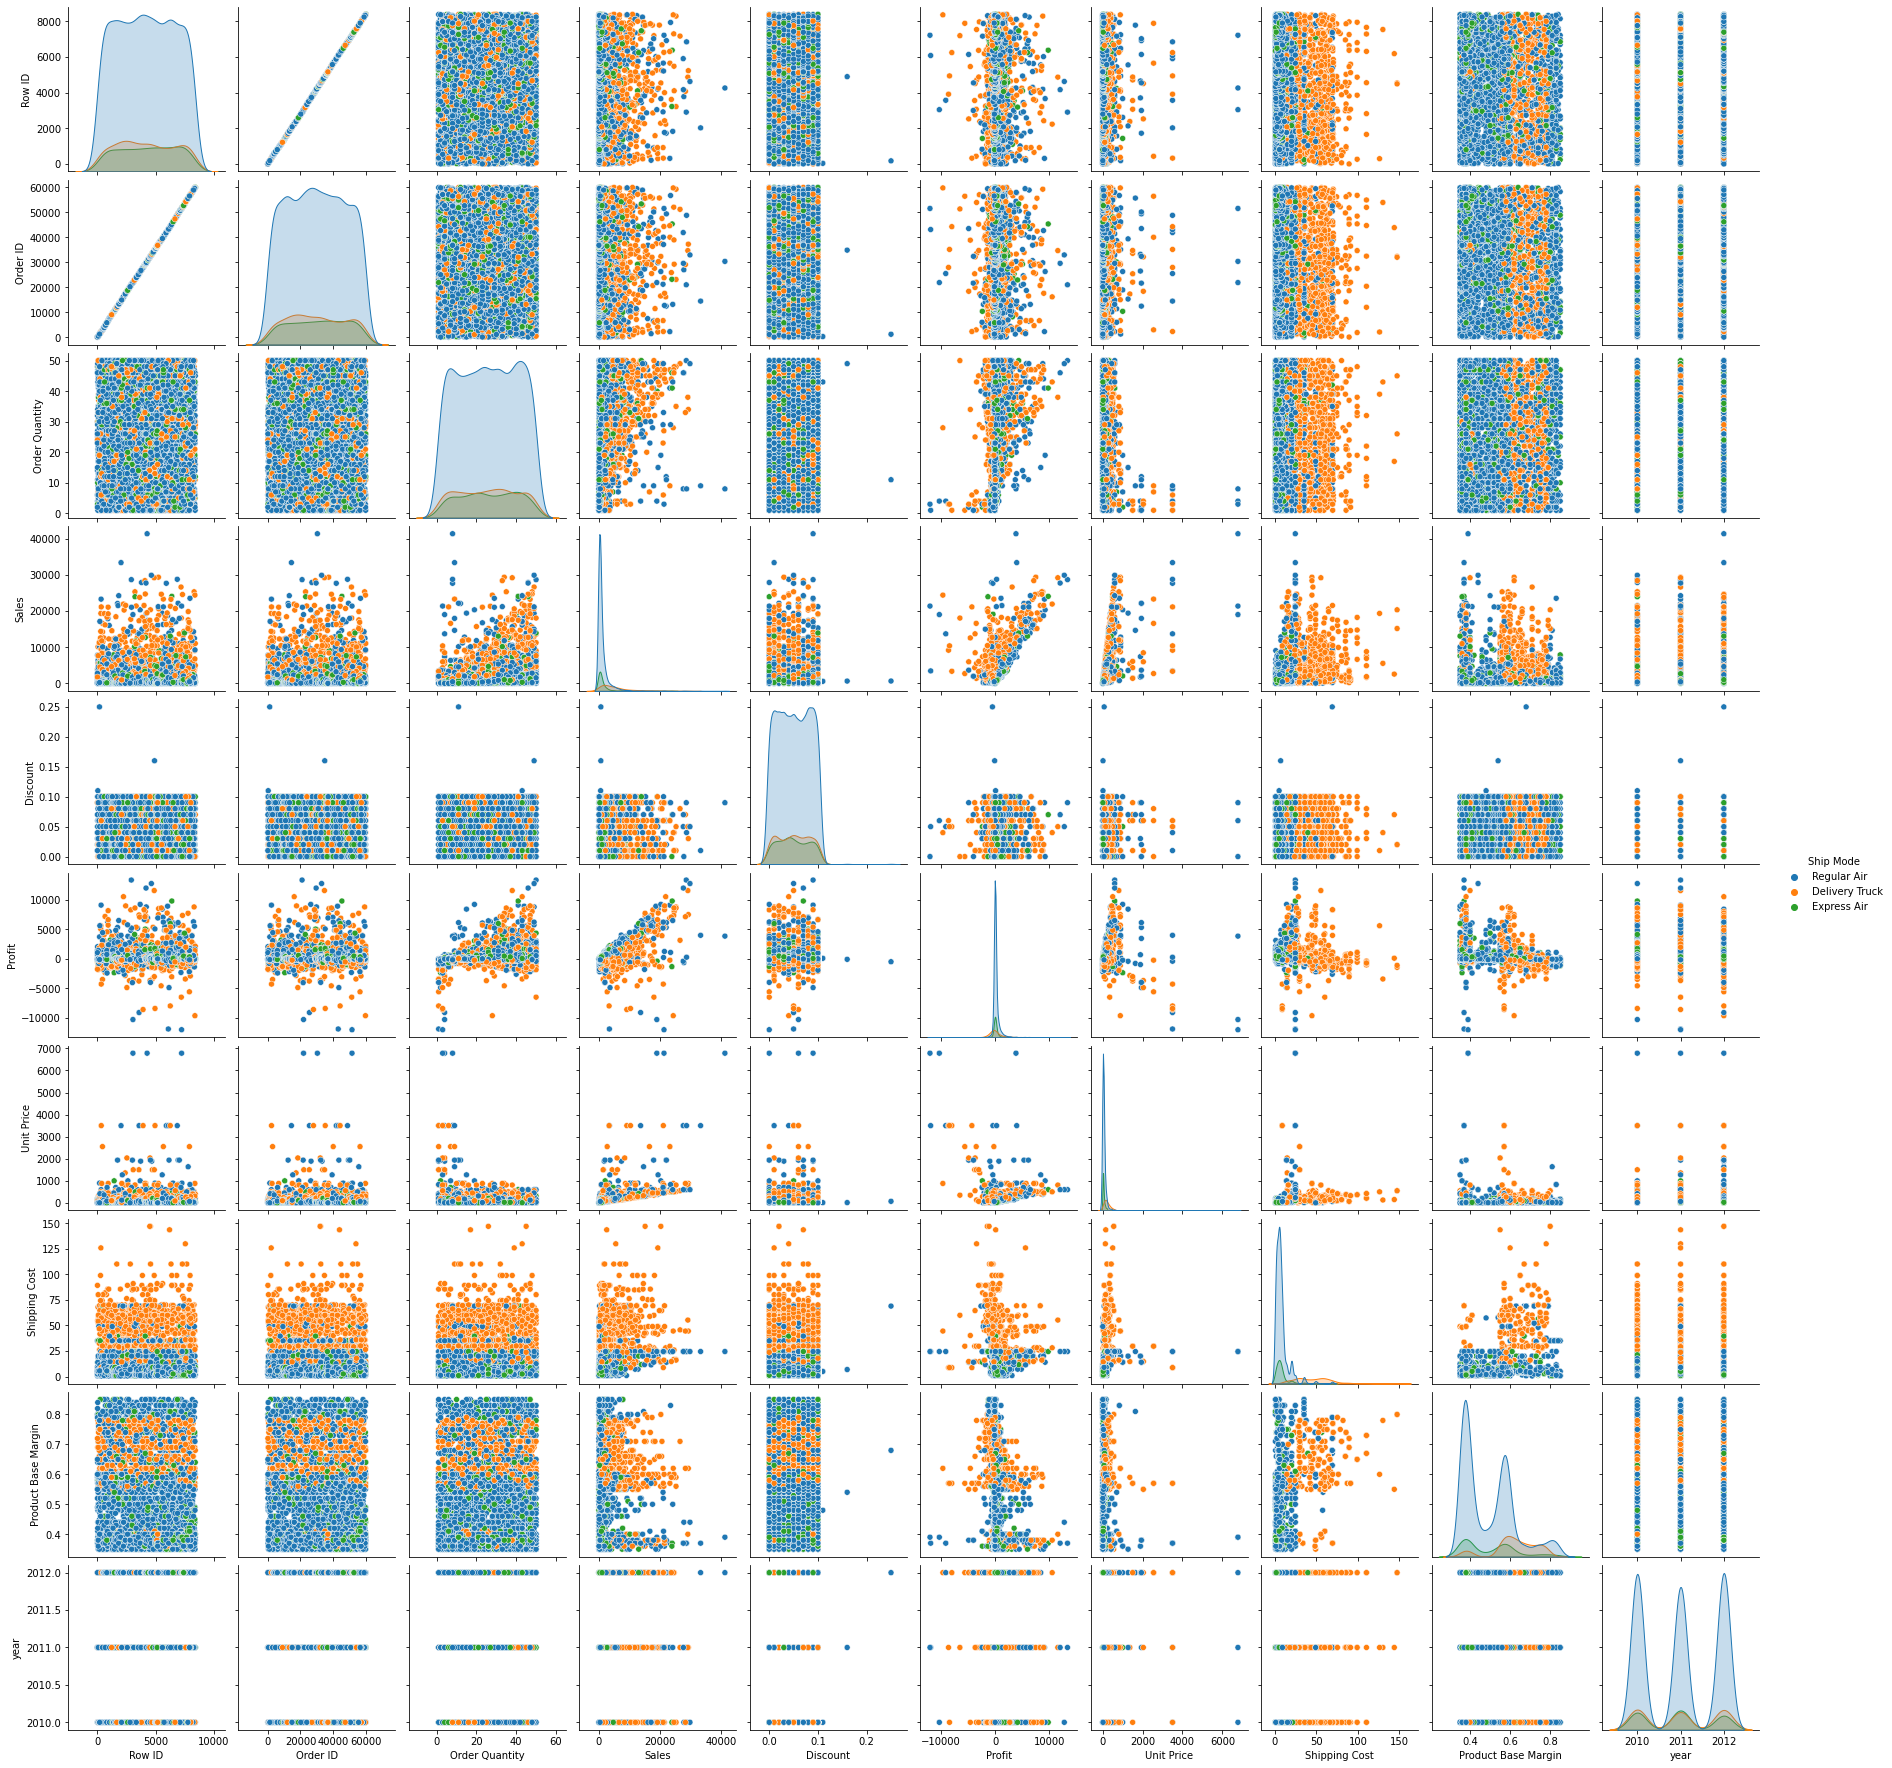

In [91]:
sns.pairplot(df,hue='Ship Mode')